#  MLP on Iris data set

Based on Lec 28, CS109 - https://harvard-iacs.github.io/2020-CS109A/lectures/lecture28/notebook-2/

**Problem** <br>
Classify 3 species of iris based on 4 measurement predictor variables: sepal length & width, and petal length & width in the given dataset.

**Approach** 
- Augment input data with column of ones to create augmented matrix X
    1. Create first layer weight matrix with a column of $b, w1, w2...$
    2. Affine transform: $h = \beta X$
    3. Activation using ReLU: $p = ReLU(h)$
- Repeat 1,2,3 for hidden layer
- Use softmax for output layer
- Predict y



<img src="./images/MLP_iris.png" style="width: 600px;" >

In [106]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from tensorflow.keras.utils import to_categorical
import seaborn as sns
sns.set()
%matplotlib inline

In [24]:
# Load iris dataset

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

print("X shape:",X.shape)
print("y shape:",y.shape)

# convert integer into categorial using one hot encode
Y = to_categorical(y)
print("Y categorical shape:",Y.shape)
Y[:3,]


X shape: (150, 4)
y shape: (150,)
Y categorical shape: (150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [38]:
# load pre-trained weights and biases
weights = np.load('data/weights.npy', allow_pickle = True)

# weights for 1st layer (hidden)
w1 = weights[0]

# biases for 1st layer (hidden)
b1 = weights[1]

# weights for 2nd layer (output)
w2 = weights[2]

# biases for 2nd layer (hidden)
b2 = weights[3]


In [45]:
# View the weight matrices and compare with diagram

print("w1", w1.shape, "\n", w1, "\n")
print("b1", b1.shape, "\n", b1, "\n")
print("w2", w2.shape, "\n", w2, "\n")
print("b2", b2.shape, "\n", b2)

w1 (4, 3) 
 [[-0.42714605 -0.72814226  0.37730372]
 [ 0.39002347 -0.73936987  0.7850246 ]
 [ 0.12336338 -0.7267647  -0.48210236]
 [ 0.20957732 -0.7505736  -1.3789996 ]] 

b1 (3,) 
 [0.         0.         0.31270522] 

w2 (3, 3) 
 [[ 0.7043929   0.13273811 -0.845736  ]
 [-0.8318007  -0.6977086   0.75894   ]
 [ 1.1978723   0.14868832 -0.473792  ]] 

b2 (3,) 
 [-1.2774311   0.45491916  0.73040146]


<img src="./images/MLP_affinematrix.png" style="width: 600px;" >

### Add extra 1s column to X and bias row to W and then do the affine transform

In [86]:
# Need to add the bias matrix on top of the weight matrix

# Add a column of ones to X to make augmented X
col_ones = np.ones((X.shape[0],1))
X_aug = np.hstack([col_ones, X])

# Add the biases to the weight matrix and make it row 1
W1 = np.vstack([b1,w1])

# dot product of X_aug and W1 --- note #cols(X_aug) = #rows(W1)
Z1 = np.dot(X_aug, W1)

# view the modifications
print("X_aug \n", X_aug[:5,:5], "\n")
print("W1 \n", W1, "\n")
print("Z1 \n", Z1[:5,:5])


X_aug 
 [[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]] 

W1 
 [[ 0.          0.          0.31270522]
 [-0.42714605 -0.72814226  0.37730372]
 [ 0.39002347 -0.73936987  0.7850246 ]
 [ 0.12336338 -0.7267647  -0.48210236]
 [ 0.20957732 -0.7505736  -1.3789996 ]] 

Z1 
 [[-0.59873851 -7.46890534  4.033797  ]
 [-0.70832103 -6.95359195  3.56582397]
 [-0.55722347 -6.88316101  3.69557838]
 [-0.52883853 -6.88176273  3.48292507]
 [-0.51702155 -7.4700281   4.07456909]]


### Use ReLU to activate the z1 in first layer

In [111]:
# Define the activation function ReLU
# ReLU = 0 for z < 0 
#      = z for z > 0

def relu(z):
    h = np.maximum(z,0)
    return h
    
H = relu(Z1)
H[:5,:5]

array([[0.        , 0.        , 4.033797  ],
       [0.        , 0.        , 3.56582397],
       [0.        , 0.        , 3.69557838],
       [0.        , 0.        , 3.48292507],
       [0.        , 0.        , 4.07456909]])

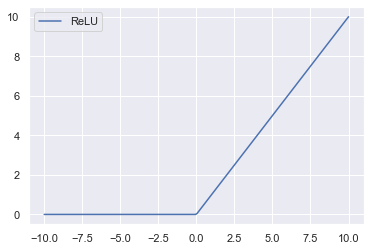

In [171]:
# check the ReLU function
x = np.linspace(-10,10,200)
plt.plot(x, relu(x), label = 'ReLU')
plt.legend();

### Second Layer or Output Layer
- Add ones to the H matrix (equivalent to X in the previous layer)
- Add the biases to the weight matrix
- Do the affine transform to get H2
- Activate H2 using softmax function


<img src="./images/MLP_layer2.png" style="width: 1000px;" >

In [109]:
# Need to add the bias matrix on top of the weight matrix

# Add a column of ones to H to make augmented H
col_ones = np.ones((H.shape[0],1))
H_aug = np.hstack([col_ones, H])

# Add the biases to the weight matrix and make it row 1
W2 = np.vstack([b2,w2])

# dot product of H_aug and W2 --- note #cols(H_aug) = #rows(W2)
Z2 = np.dot(H_aug, W2)

# view the modifications
print("H_aug \n", H_aug[:5,:5], "\n")
print("W2 \n", W2, "\n")
print("Z2 \n", Z2[:5,:5])


H_aug 
 [[1.         0.         0.         4.033797  ]
 [1.         0.         0.         3.56582397]
 [1.         0.         0.         3.69557838]
 [1.         0.         0.         3.48292507]
 [1.         0.         0.         4.07456909]] 

W2 
 [[-1.2774311   0.45491916  0.73040146]
 [ 0.7043929   0.13273811 -0.845736  ]
 [-0.8318007  -0.6977086   0.75894   ]
 [ 1.1978723   0.14868832 -0.473792  ]] 

Z2 
 [[ 3.55454249  1.05469764 -1.18077924]
 [ 2.99397056  0.98511552 -0.95905736]
 [ 3.14939977  1.00440849 -1.02053396]
 [ 2.89466827  0.97278942 -0.91978053]
 [ 3.60338224  1.06075998 -1.20009673]]


<img src="./images/MLP_softmax.png" style="width: 800px;" >

### Use Softmax to activate the Z2 in output layer

In [165]:
def softmax(z):
    # Inputs: 2D array of logits, rows = observations, cols = classes
       
    # Returns: y_hat - 2D array of probabilities of class
    
    #y_hat = np.exp(z)/np.sum(np.exp(z), axis = 1)
    y_hat = np.exp(z)/np.sum(np.exp(z), axis = 1, keepdims = True)
    return y_hat

# gives the probability of each class for all observations
y_hat = softmax(Z2)  

# Converts the prob into classes 0,1,2 based on max prob
y_hat = np.argmax(y_hat, axis = 1)
y_hat


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [169]:
# Check accuracy of model
accuracy = sum(y_hat == y)/len(y)

print("Accuracy of model is", accuracy)

Accuracy of model is 0.9666666666666667
